# Objective

## The classification goal is to predict the likelihood of a liability customer buying personal loans.


## Steps & Tasks

### 1. Read the column description and ensure you understand each attribute well 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns     # library for advance visualization

In [2]:
banking_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
banking_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
banking_data.shape

(5000, 14)

In [4]:
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### 2. Study the data distribution in each attribute, share your findings 

In [5]:
# number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( banking_data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


* There are no missing values

In [6]:
banking_data.describe().transpose() # the output results provide the five number summary of the data.

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Mean:  45.3384 
Median:  45.0 
Mode:  35


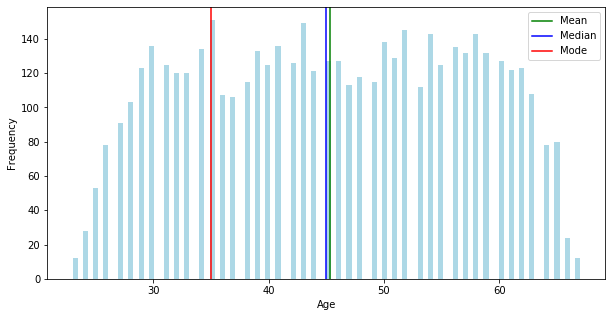

In [10]:
mean=banking_data['Age'].mean()
median=banking_data['Age'].median()
mode=banking_data['Age'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(banking_data['Age'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Age')         # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* The distribution for Age is kind of varying

Mean:  73.7742 
Median:  64.0 
Mode:  44


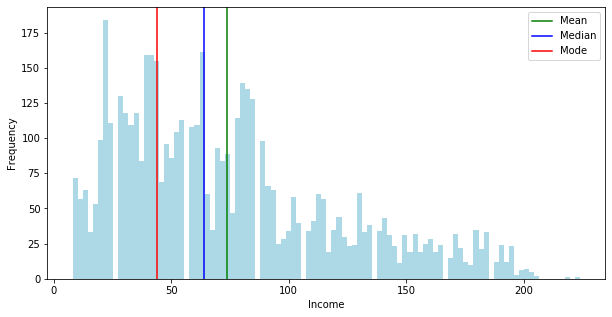

In [11]:
mean=banking_data['Income'].mean()
median=banking_data['Income'].median()
mode=banking_data['Income'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(banking_data['Income'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Income')         # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* The distribution for Income is right skewed

Mean:  20.1046 
Median:  20.0 
Mode:  32


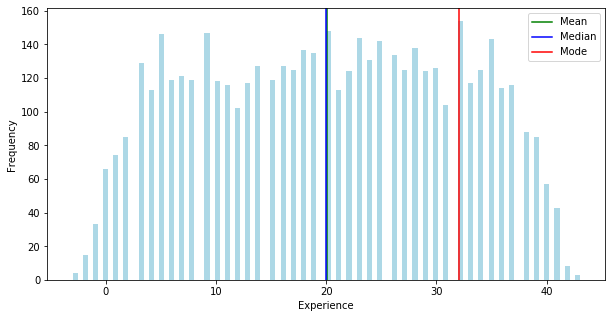

In [12]:
mean=banking_data['Experience'].mean()
median=banking_data['Experience'].median()
mode=banking_data['Experience'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(banking_data['Experience'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Experience')         # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* The distribution for Experience is left skewed

Mean:  2.3964 
Median:  2.0 
Mode:  1


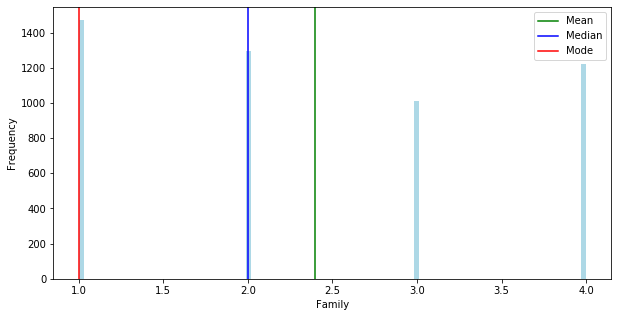

In [13]:
mean=banking_data['Family'].mean()
median=banking_data['Family'].median()
mode=banking_data['Family'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(banking_data['Family'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Family')         # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* The distribution for Family is right skewed

Mean:  1.9379380000000053 
Median:  1.5 
Mode:  0.3


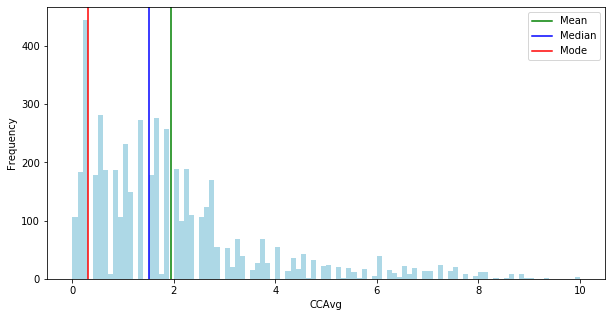

In [15]:
mean=banking_data['CCAvg'].mean()
median=banking_data['CCAvg'].median()
mode=banking_data['CCAvg'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(banking_data['CCAvg'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('CCAvg')         # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* The distribution for Family is right skewed

Mean:  56.4988 
Median:  0.0 
Mode:  0


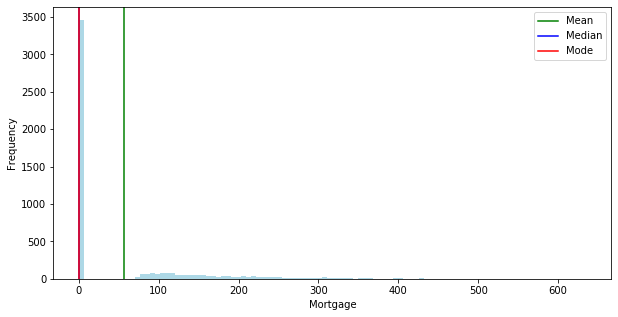

In [16]:
mean=banking_data['Mortgage'].mean()
median=banking_data['Mortgage'].median()
mode=banking_data['Mortgage'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(banking_data['Mortgage'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Mortgage')         # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* The distribution for Family is right skewed

##### Distribution of attributes by target attribute

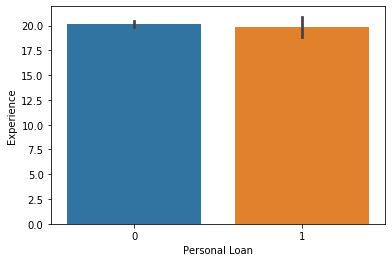

In [9]:
sns.barplot(x="Personal Loan", y="Experience",  data=banking_data);

* Person with high experience seems to take personal loan

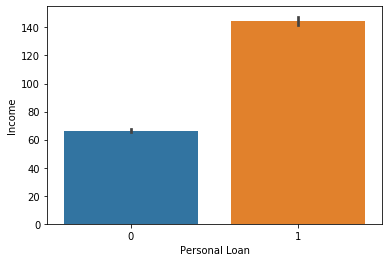

In [10]:
sns.barplot(x="Personal Loan", y="Income",  data=banking_data);

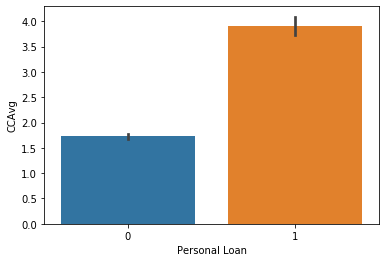

In [11]:
sns.barplot(x="Personal Loan", y="CCAvg",  data=banking_data);

* Personal loans are taken by those whose CC Avg is higher

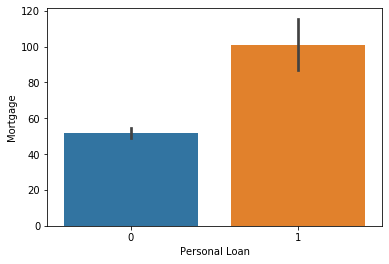

In [12]:
sns.barplot(x="Personal Loan", y="Mortgage",  data=banking_data);

* Personal loans are taken by those who have higher mortage value

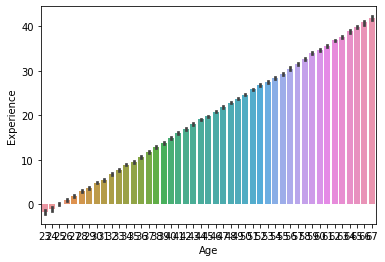

In [13]:
sns.barplot(x="Age", y="Experience",  data=banking_data);

* Income and Age is postively correlated

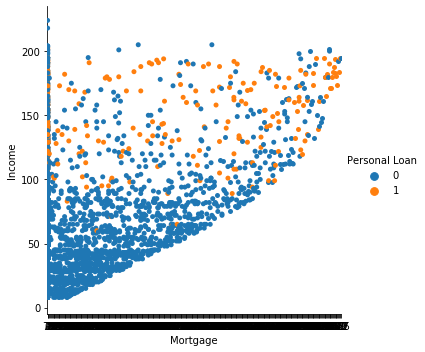

In [19]:
sns.catplot(x="Mortgage", y="Income", hue = "Personal Loan", data=banking_data);

* From the distribution above, we see that Personal loan is opted by those with higher income

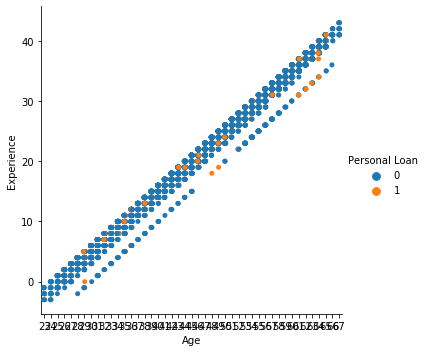

In [20]:
sns.catplot(x="Age", y="Experience", hue = "Personal Loan", data=banking_data);

* With hue option as Personal Loans, we can see that customers who have older and high income most likely opt for a personal loans 

C:\Users\Neema MV\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Neema MV\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


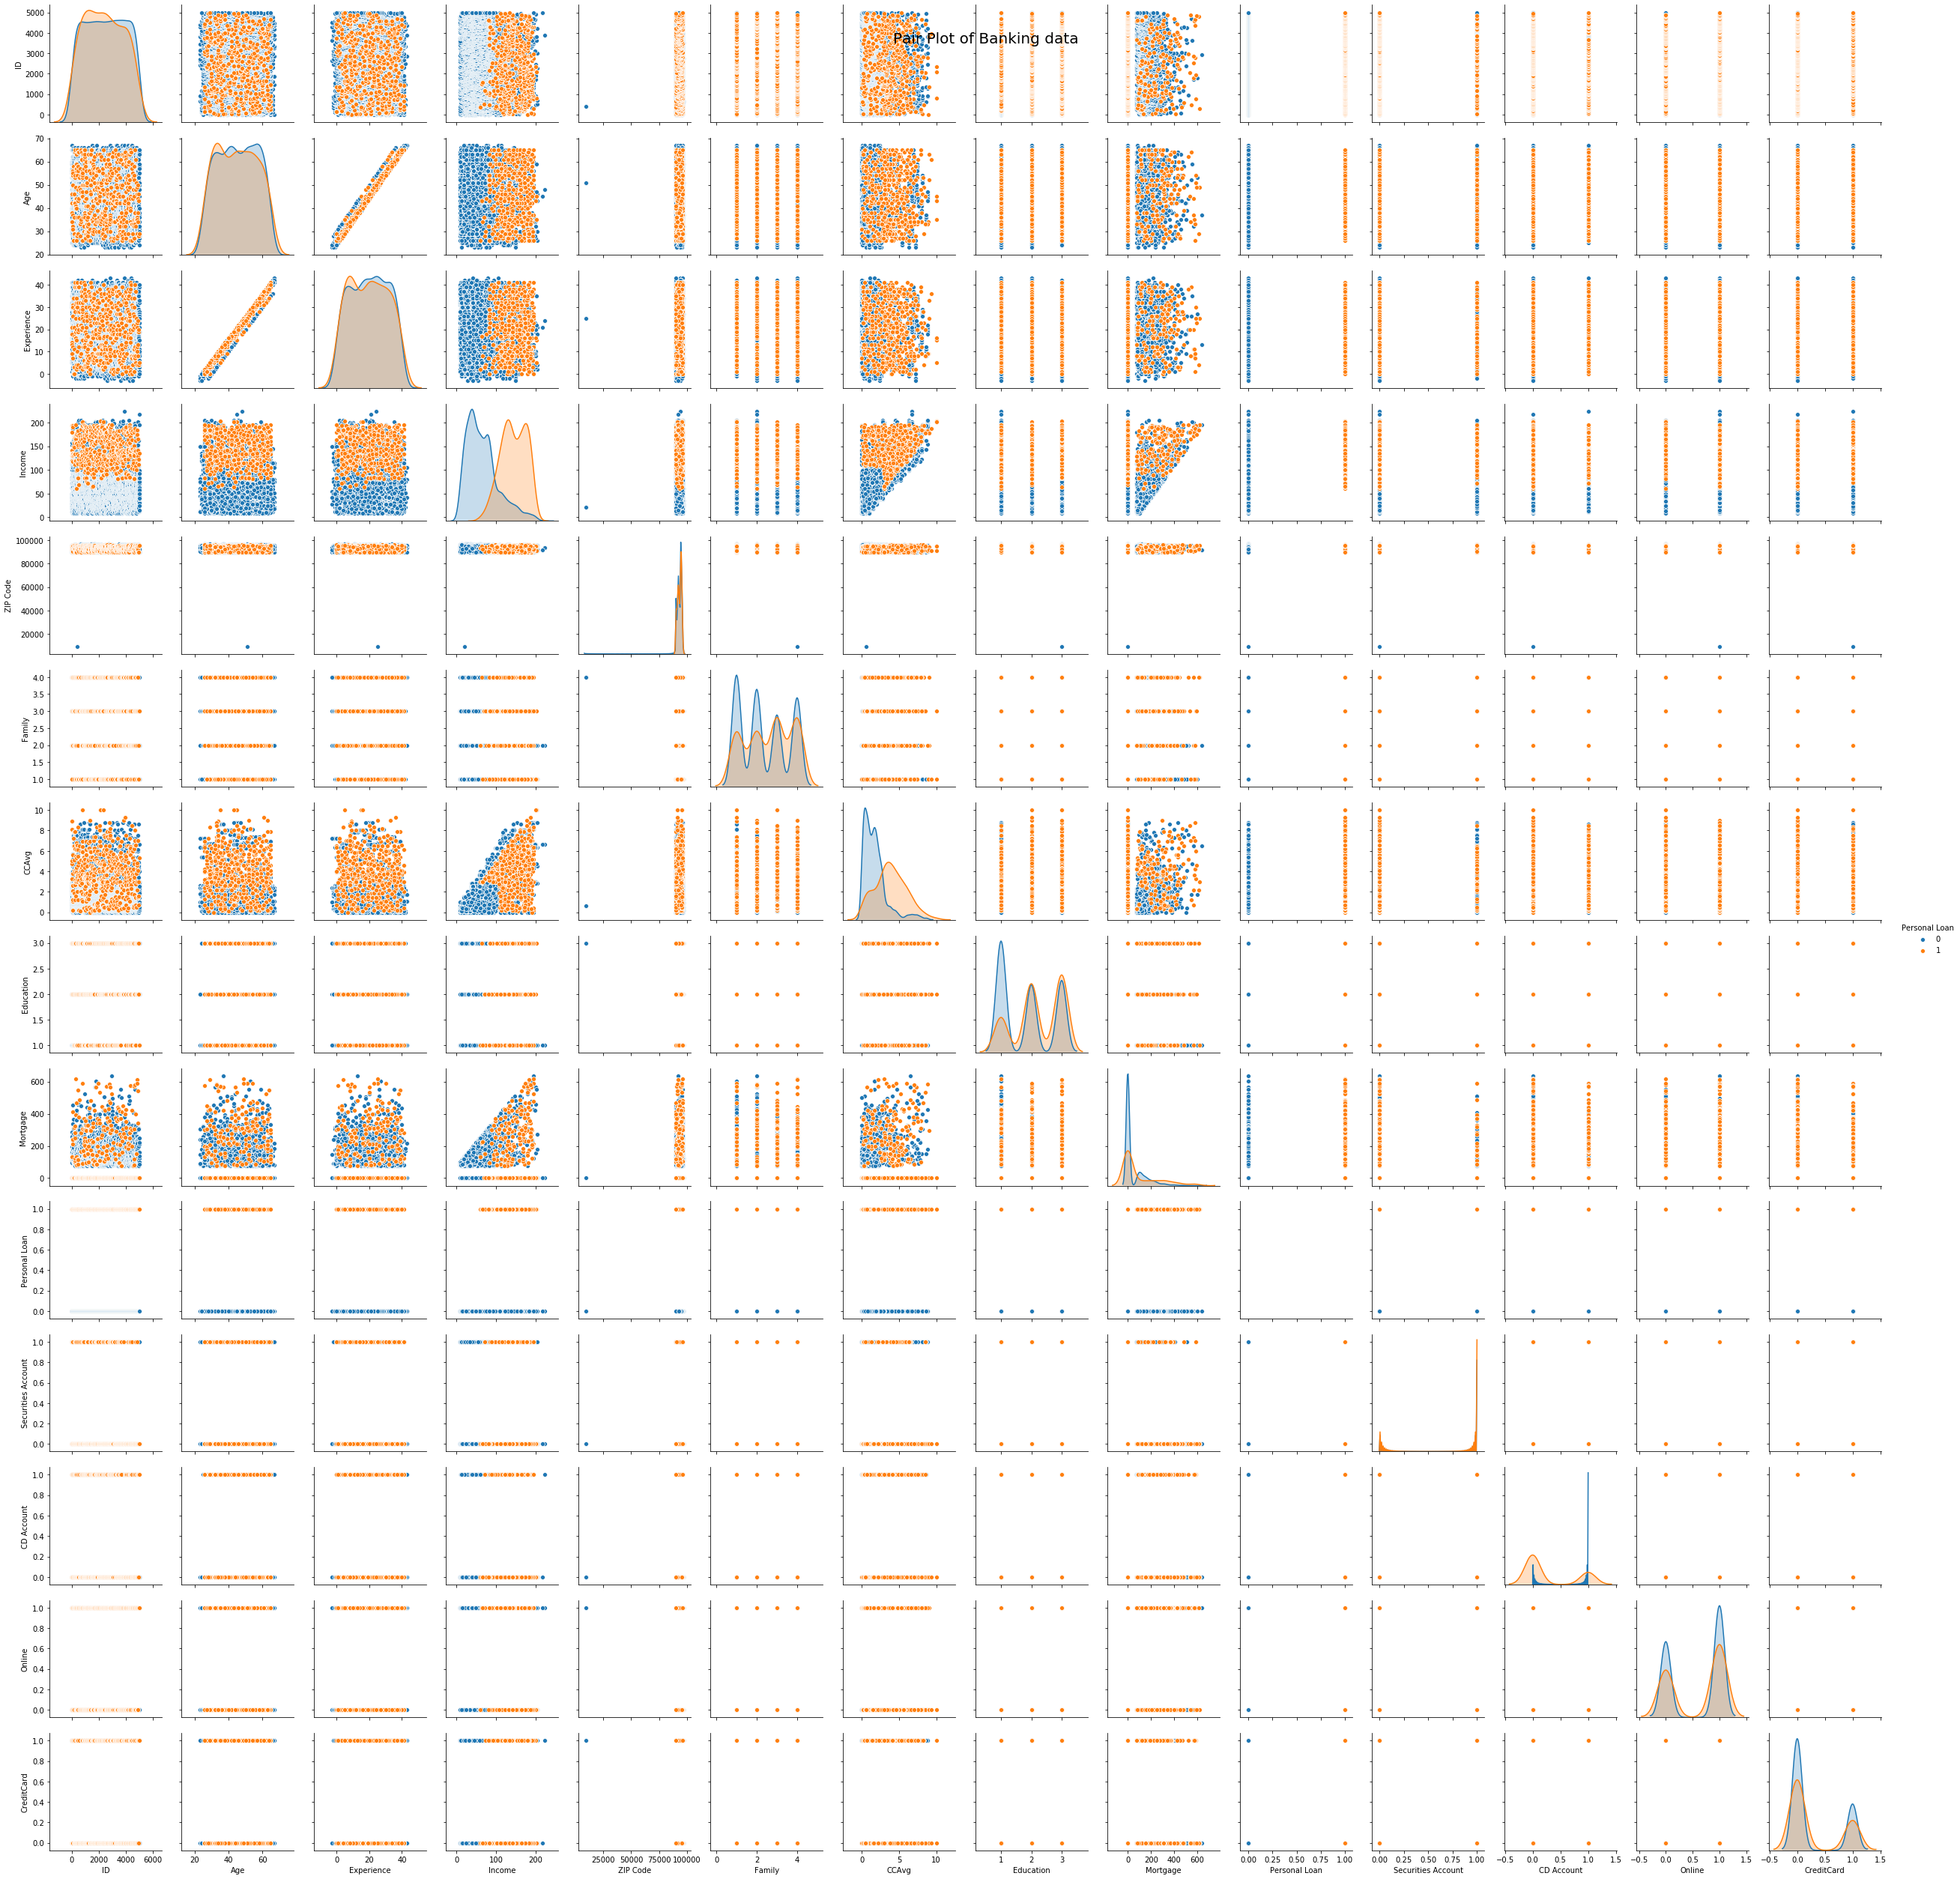

In [15]:
sns.pairplot(banking_data,  hue = "Personal Loan") 
plt.suptitle('Pair Plot of Banking data', 
             size = 20);# plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

* Mortage and Income are positively correlated.
* Experience and Age go hand in hand (positively correlated).
* Income and CCAvg are positively correclated.

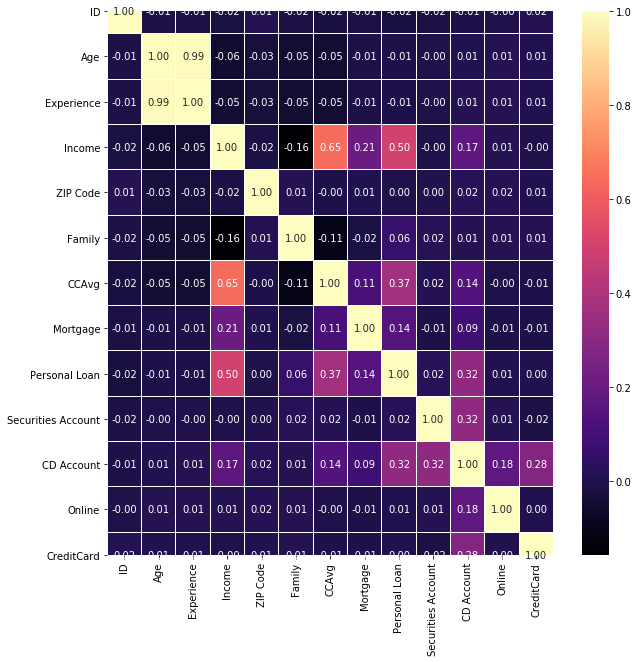

In [33]:
# Heat map for checking the correlation
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(banking_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

* The heat map shows similar patterns as mentioned above

### 3. Distribution of target column

In [23]:
n_true = len(banking_data.loc[banking_data['Personal Loan'] == 1])
n_false = len(banking_data.loc[banking_data['Personal Loan'] == 0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


So we have 9.60% people in current data set who have accepted personal loans and rest of 90.40% did not. 


### Visual representation of target column distribution

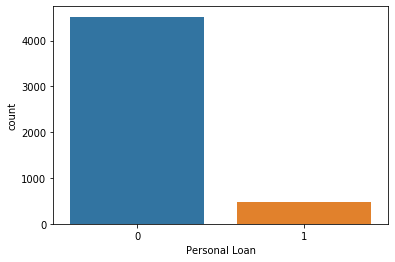

In [14]:
sns.countplot(x="Personal Loan",data=banking_data);

* Visually it is depicted above as well.

### 4. Splitting the data

#### We will use 70% of data for training and 30% for testing

In [24]:
from sklearn.model_selection import train_test_split

X = banking_data.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = banking_data['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0


Lets check split of data

In [26]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(banking_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(banking_data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check Personal Loan True/False ratio in split data 

In [27]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(banking_data.loc[banking_data['Personal Loan'] == 1]), (len(banking_data.loc[banking_data['Personal Loan'] == 1])/len(banking_data.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(banking_data.loc[banking_data['Personal Loan'] == 0]), (len(banking_data.loc[banking_data['Personal Loan'] == 0])/len(banking_data.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 480 (9.60%)
Original Diabetes False Values   : 4520 (90.40%)

Training Diabetes True Values    : 331 (9.46%)
Training Diabetes False Values   : 3169 (90.54%)

Test Diabetes True Values        : 149 (9.93%)
Test Diabetes False Values       : 1351 (90.07%)



# Data Preparation

### Check hidden missing values 

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [29]:
x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0


We can see lots of 0 entries above.

### Replace 0s with serial mean 

In [30]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#data_with_imputed_values = my_imputer.fit_transform(original_data)

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1335.0,47.0,22.0,35.0,94304.0,2.0,1.3,1.0,181.659259,1.0,1.0,1.0,1.0
1,4769.0,38.0,14.0,39.0,93118.0,1.0,2.0,2.0,181.659259,1.0,1.0,1.0,1.0
2,66.0,59.0,35.0,131.0,91360.0,1.0,3.8,1.0,181.659259,1.0,1.0,1.0,1.0
3,178.0,29.0,3.0,65.0,94132.0,4.0,1.8,2.0,244.000000,1.0,1.0,1.0,1.0
4,4490.0,39.0,13.0,21.0,95518.0,3.0,0.2,2.0,181.659259,1.0,1.0,1.0,1.0


## 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

## Logistic Regression

In [31]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.000038 -0.000532 -0.000359  0.035603 -0.000066  0.000862  0.001413   

          7         8         9        10        11        12  intercept  
0  0.000983  0.001374 -0.000007 -0.000007 -0.000007 -0.000007  -0.000007  


In [32]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9093333333333333


## Train Naive Bayes algorithm 

In [37]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
diab_model = GaussianNB()

diab_model.fit(x_train, y_train.ravel())

C:\Users\Neema MV\Anaconda3\lib\site-packages\pandas\core\series.py:628: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  return self._values.ravel(order=order)


GaussianNB(priors=None, var_smoothing=1e-09)

### Performance of our model with training data

In [38]:
diab_test_predict = diab_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.8867



## Build kNN Model

In [43]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


In [45]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

## Evaluate Performance of kNN Model

In [46]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.902

## 6. Print the confusion matrix for all the above models 

## Logistic Regression

(2.0, 0.0)

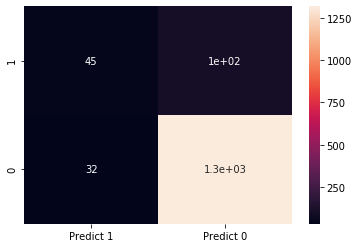

In [58]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
ax=sns.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The confusion matrix

True Positives (TP): we correctly predicted that they choose Personal Loan 45

True Negatives (TN): we correctly predicted that they don't chose Personal loan 1319

False Positives (FP): we incorrectly predicted that they will chose Personal Loan (a "Type I error") 32 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they will not chose Personal Loan  (a "Type II error") 104 Falsely predict negative Type II error

## Naive Bayes

Confusion Matrix


(2.0, 0.0)

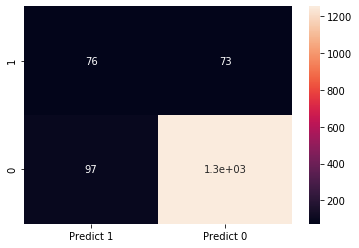

In [57]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])


ax=sns.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The confusion matrix

True Positives (TP): we correctly predicted that they choose Personal Loan 76

True Negatives (TN): we correctly predicted that they don't chose Personal loan 1254

False Positives (FP): we incorrectly predicted that they will chose Personal Loan (a "Type I error") 97 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they will not chose Personal Loan  (a "Type II error") 73 Falsely predict negative Type II error

## KNN

Confusion Matrix


(2.0, 0.0)

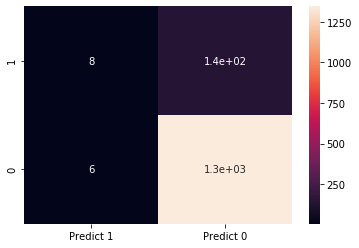

In [55]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

ax=sns.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The confusion matrix

True Positives (TP): we correctly predicted that they choose Personal Loan 8

True Negatives (TN): we correctly predicted that they don't chose Personal loan 1345

False Positives (FP): we incorrectly predicted that they will chose Personal Loan (a "Type I error") 6 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they will not chose Personal Loan  (a "Type II error") 141 Falsely predict negative Type II error

### 7. Give your reasoning on which is the best model in this case and why it performs better?

* Logistic Regression Model Accuracy: 90.03% where in the model correctly predicted about 1364 out of 1500 data and rest incorrectly predicted. 
* Naive Bayes Model Accuracy: 88.67% where in the model correctly predicted about 1330 out of 1500 data and rest incorrectly predicted.
* KNN Model Accuracy: 90.2% where in the model correctly predicted 1353 about out of 1500 data and the rest incorrectly predicted.

#### Model selection factors:
* In terms of Model accuracy, it is well known that Logistic Regression has performed best compared to the rest of the model.

* With respect to Subject matter expert and metrics like False Positves & False Negatives, we suggest that company do not want to lose on customers who are likely to buy personal loans. Hence we select the model with lesser false negatives 

* Keep these two criterias in mind, Lofistic regression has high model accuracy and less False negatives.

### The best model is "Logistic Regression Model"